<a href="https://colab.research.google.com/github/Theoph-ay/pytorch_tutorials/blob/main/04_exercises_custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Torch

In [ ]:
import torch
from torch import nn

print(torch.__version__)

2.9.0+cu126


In [ ]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Get Data

In [ ]:
# Creating file path and downloading data
from pathlib import Path
import zipfile
import requests

data_path = Path("data /")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} exists.. Skipping creation of directory")
else:
  print(f"Creating directory {image_path}")
  image_path.mkdir(parents = True, exist_ok = True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  print(f"Downloading pizza, steak, sushi data...")
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping Downloaded data")
  zip_ref.extractall(path = image_path)
  print("data_downloaded")

Creating directory data /pizza_steak_sushi
Unzipping Downloaded data
data_downloaded


In [ ]:
# Creating train and test data dir
train_dir = image_path / "train"
test_dir = image_path / "test"

In [ ]:
# Get an idea of what is in our dataset
import os

for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in data /pizza_steak_sushi
There are 3 directories and 0 images in data /pizza_steak_sushi/test
There are 0 directories and 25 images in data /pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in data /pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data /pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data /pizza_steak_sushi/train
There are 0 directories and 78 images in data /pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in data /pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data /pizza_steak_sushi/train/sushi


Image Class: pizza


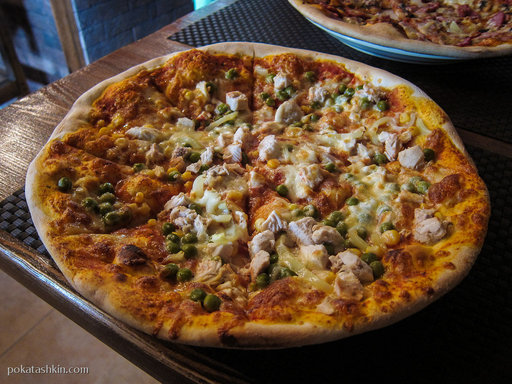

In [ ]:
#let's view an image from out train data
from PIL import Image
import matplotlib.pyplot as plt

#Create a an image path list
image_path_list = list(image_path.glob("*/*/*.jpg"))

img= image_path_list[0] #you can also selct random image from the image_path_list using `random.choice`

print(f"Image Class: {img.parent.stem}")
Image.open(img)

## Transform data

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Make the data into dataset using ImageFolder

from torchvision.datasets import ImageFolder

train_data = ImageFolder(
    root = train_dir,
    transform = transform,
    target_transform = None
)

test_data = ImageFolder(
    root = test_dir,
    transform = transform,
    target_transform = None
)


In [ ]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data /pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data /pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
# Create DataLoader
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = False
)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7802fb57cf20>,
 <torch.utils.data.dataloader.DataLoader at 0x7802e4aa1ac0>)

In [ ]:
img, label = next(iter(train_dataloader))
img, label

(tensor([[[[0.0471, 0.0392, 0.1686,  ..., 0.4392, 0.4353, 0.4353],
           [0.0392, 0.1255, 0.4078,  ..., 0.4157, 0.4392, 0.4510],
           [0.1137, 0.3843, 0.5216,  ..., 0.0941, 0.1255, 0.1529],
           ...,
           [0.6353, 0.6314, 0.6510,  ..., 0.6314, 0.6196, 0.6039],
           [0.6235, 0.6235, 0.6353,  ..., 0.6235, 0.6157, 0.6078],
           [0.6118, 0.6078, 0.6196,  ..., 0.6627, 0.6118, 0.5922]],
 
          [[0.0118, 0.0157, 0.1294,  ..., 0.3765, 0.3647, 0.3569],
           [0.0118, 0.0863, 0.3569,  ..., 0.3765, 0.3922, 0.3961],
           [0.0706, 0.3255, 0.4588,  ..., 0.0706, 0.1020, 0.1294],
           ...,
           [0.6667, 0.6784, 0.6863,  ..., 0.6824, 0.6745, 0.6627],
           [0.6549, 0.6706, 0.6706,  ..., 0.6745, 0.6667, 0.6549],
           [0.6431, 0.6549, 0.6588,  ..., 0.6980, 0.6588, 0.6471]],
 
          [[0.0078, 0.0157, 0.1098,  ..., 0.2980, 0.2902, 0.2863],
           [0.0118, 0.0706, 0.3137,  ..., 0.3255, 0.3373, 0.3373],
           [0.0627, 0.28

## Create TinyVGG class and Model_0

In [ ]:
# Creating TinyVGG class
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0
                  ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
  )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 0
                ),
      nn.ReLU(),
      nn.Conv2d(
          in_channels = hidden_units,
          out_channels = hidden_units,
          kernel_size = 3,
          stride = 1,
          padding = 0
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2)
  )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units  *13 * 13,
                  out_features = output_shape)
        )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.linear_layer(x)
    return x


In [ ]:
img_1, label_1 = train_data[0]
img_1.shape

torch.Size([3, 64, 64])

In [ ]:
image_classes = train_data.classes
image_classes

['pizza', 'steak', 'sushi']

#Creating Training and testing loop function

In [ ]:
#Train_step()
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device
):

  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #calculate the accuracy metric
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

  #Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
  model.eval()

  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# create a train function

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # Move model to device
  model.to(device)

  #empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
  }

  #loop through epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       accuracy_fn=accuracy_fn,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
    # Print whats happening
    print(
        f"Epoch: {epoch} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss} | "
        f"test_acc: {test_acc}"
        )
    #update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #return the results
  return results

## Set up loss and accuracy function and optimizer

In [ ]:
# install torchmetrics
!pip install torchmetrics

from torchmetrics.classification import MulticlassAccuracy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.4 MB/s eta 0:00:00


In [ ]:
#Accuracy fn, loss_fn
accuracy_fn = MulticlassAccuracy(num_classes = len(image_classes)).to(device)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(34)
start_time_model_0 = timer()
EPOCHS = 5

#model

model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(image_classes))

optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

model_0_results = train(
    model = model_0,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_0 = timer()
print(f"Total training time: {end_time_model_0 - start_time_model_0}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.1041 | train_acc: 0.2969 | test_loss: 1.0891209443410237 | test_acc: 0.5
Epoch: 1 | train_loss: 1.0898 | train_acc: 0.4167 | test_loss: 1.0636007189750671 | test_acc: 0.5
Epoch: 2 | train_loss: 1.1115 | train_acc: 0.2917 | test_loss: 1.0747495492299397 | test_acc: 0.5
Epoch: 3 | train_loss: 1.1023 | train_acc: 0.3173 | test_loss: 1.13677974541982 | test_acc: 0.3333333432674408
Epoch: 4 | train_loss: 1.0850 | train_acc: 0.4806 | test_loss: 1.0993259747823079 | test_acc: 0.1904762089252472
Total training time: 10.069466626999997


In [ ]:
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(34)
start_time_model_1 = timer()
EPOCHS = 20

#model

model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(image_classes))

optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.001)

model_1_results = train(
    model = model_1,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_1 = timer()
print(f"Total training time: {end_time_model_1 - start_time_model_1}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.1041 | train_acc: 0.2969 | test_loss: 1.089120904604594 | test_acc: 0.5
Epoch: 1 | train_loss: 1.0898 | train_acc: 0.4167 | test_loss: 1.0635765194892883 | test_acc: 0.5
Epoch: 2 | train_loss: 1.1115 | train_acc: 0.2917 | test_loss: 1.074724515279134 | test_acc: 0.5
Epoch: 3 | train_loss: 1.1022 | train_acc: 0.3173 | test_loss: 1.136812448501587 | test_acc: 0.3333333432674408
Epoch: 4 | train_loss: 1.0855 | train_acc: 0.4806 | test_loss: 1.0989878972371419 | test_acc: 0.1904762089252472
Epoch: 5 | train_loss: 1.0913 | train_acc: 0.2917 | test_loss: 1.0971989432970684 | test_acc: 0.1666666716337204
Epoch: 6 | train_loss: 1.0644 | train_acc: 0.3338 | test_loss: 1.0128742059071858 | test_acc: 0.3048100173473358
Epoch: 7 | train_loss: 0.9997 | train_acc: 0.5364 | test_loss: 1.0900907317797344 | test_acc: 0.24994710087776184
Epoch: 8 | train_loss: 1.0493 | train_acc: 0.4456 | test_loss: 1.0612434546152751 | test_acc: 0.32116401195526123
Epoch: 9 | train_loss: 0.8366

In [ ]:
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(34)

start_time_model_2 = timer()
EPOCHS = 50

#model

model_2 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(image_classes))

optimizer = torch.optim.Adam(params=model_2.parameters(), lr = 0.001)

model_2_results = train(
    model = model_2,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_2 = timer()
print(f"Total training time: {end_time_model_2 - start_time_model_2}")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.1041 | train_acc: 0.2969 | test_loss: 1.0891209443410237 | test_acc: 0.5
Epoch: 1 | train_loss: 1.0898 | train_acc: 0.4167 | test_loss: 1.0636098384857178 | test_acc: 0.5
Epoch: 2 | train_loss: 1.1115 | train_acc: 0.2917 | test_loss: 1.0746692021687825 | test_acc: 0.5
Epoch: 3 | train_loss: 1.1023 | train_acc: 0.3173 | test_loss: 1.137090007464091 | test_acc: 0.3333333432674408
Epoch: 4 | train_loss: 1.0852 | train_acc: 0.4806 | test_loss: 1.0995434522628784 | test_acc: 0.1904762089252472
Epoch: 5 | train_loss: 1.0920 | train_acc: 0.2917 | test_loss: 1.0988205472628276 | test_acc: 0.1666666716337204
Epoch: 6 | train_loss: 1.0639 | train_acc: 0.3626 | test_loss: 1.0206817189852397 | test_acc: 0.2774507403373718
Epoch: 7 | train_loss: 1.0019 | train_acc: 0.5270 | test_loss: 1.085018515586853 | test_acc: 0.24994710087776184
Epoch: 8 | train_loss: 1.0400 | train_acc: 0.4456 | test_loss: 1.0589104096094768 | test_acc: 0.3322751522064209
Epoch: 9 | train_loss: 0.8327

In [ ]:
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(34)

start_time_model_3 = timer()
EPOCHS = 20

#model

model_3 = TinyVGG(input_shape = 3,
                  hidden_units = 20,
                  output_shape = len(image_classes))

optimizer = torch.optim.Adam(params=model_3.parameters(), lr = 0.001)

model_3_results = train(
    model = model_3,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_3 = timer()
print(f"Total training time: {end_time_model_3 - start_time_model_3}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.0991 | train_acc: 0.4179 | test_loss: 1.106833537419637 | test_acc: 0.3333333432674408
Epoch: 1 | train_loss: 1.0858 | train_acc: 0.4167 | test_loss: 1.1158456007639568 | test_acc: 0.3333333432674408
Epoch: 2 | train_loss: 1.0984 | train_acc: 0.2917 | test_loss: 1.1097631851832073 | test_acc: 0.3400000035762787
Epoch: 3 | train_loss: 1.0896 | train_acc: 0.4444 | test_loss: 1.0807600418726604 | test_acc: 0.2826310992240906
Epoch: 4 | train_loss: 1.0085 | train_acc: 0.5896 | test_loss: 1.0739942789077759 | test_acc: 0.4286075234413147
Epoch: 5 | train_loss: 0.9908 | train_acc: 0.5519 | test_loss: 1.0471075574556987 | test_acc: 0.22012507915496826
Epoch: 6 | train_loss: 0.9048 | train_acc: 0.5747 | test_loss: 1.0772092541058857 | test_acc: 0.20295333862304688
Epoch: 7 | train_loss: 0.8513 | train_acc: 0.6260 | test_loss: 1.0553929805755615 | test_acc: 0.25638771057128906
Epoch: 8 | train_loss: 0.8358 | train_acc: 0.6324 | test_loss: 1.0236395796140034 | test_acc: 

## Get 20% data

In [ ]:
image_path_20_percent = data_path / "pizza_steak_sushi_20_percent"
with open (data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi_20_percent.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
  zip_ref.extractall(image_path_20_percent)
  print("data Extracted")

data Extracted


In [ ]:
train_20_dir = image_path_20_percent / "train"
test_20_dir = image_path_20_percent / "test"

In [ ]:
# train 20% dataloader
train_20_data = ImageFolder(
    root = train_20_dir,
    transform = transform,
    target_transform = None
)

test_20_data = ImageFolder(
    root = test_20_dir,
    transform = transform,
    target_transform = None
)

In [ ]:
# Dataloader
train_20_dataloader = DataLoader(
    dataset = train_20_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
)

test_20_dataloader = DataLoader(
    dataset = test_20_data,
    batch_size = BATCH_SIZE,
    shuffle = False,
)

In [ ]:
#Train model_4
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(43)

start_time_model_4 = timer()
EPOCHS = 20

#model

model_4 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(image_classes))

optimizer = torch.optim.Adam(params=model_4.parameters(), lr = 0.001)

model_4_results = train(
    model = model_4,
    train_dataloader = train_20_dataloader,
    test_dataloader = test_20_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_4 = timer()
print(f"Total training time: {end_time_model_4 - start_time_model_4}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.1045 | train_acc: 0.3444 | test_loss: 1.1008758306503297 | test_acc: 0.30000001192092896
Epoch: 1 | train_loss: 1.0978 | train_acc: 0.3111 | test_loss: 1.0905439615249635 | test_acc: 0.20802369713783264
Epoch: 2 | train_loss: 1.0962 | train_acc: 0.4406 | test_loss: 1.0847659587860108 | test_acc: 0.19903498888015747
Epoch: 3 | train_loss: 1.0948 | train_acc: 0.3964 | test_loss: 1.0748434782028198 | test_acc: 0.1980248987674713
Epoch: 4 | train_loss: 1.0668 | train_acc: 0.4252 | test_loss: 1.0238557577133178 | test_acc: 0.23786978423595428
Epoch: 5 | train_loss: 0.9881 | train_acc: 0.5505 | test_loss: 0.9542381763458252 | test_acc: 0.25169554352760315
Epoch: 6 | train_loss: 0.9616 | train_acc: 0.5095 | test_loss: 0.9396076798439026 | test_acc: 0.2510431706905365
Epoch: 7 | train_loss: 0.9591 | train_acc: 0.5191 | test_loss: 0.9540304780006409 | test_acc: 0.24816016852855682
Epoch: 8 | train_loss: 0.9018 | train_acc: 0.5589 | test_loss: 0.9550059556961059 | test_a

In [ ]:
#Train model_5
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(43)

start_time_model_5= timer()
EPOCHS = 20

#model

model_5 = TinyVGG(input_shape = 3,
                  hidden_units = 20,
                  output_shape = len(image_classes))

optimizer = torch.optim.Adam(params=model_5.parameters(), lr = 0.001)

model_5_results = train(
    model = model_5,
    train_dataloader = train_20_dataloader,
    test_dataloader = test_20_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_5 = timer()
print(f"Total training time: {end_time_model_5 - start_time_model_5}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.0965 | train_acc: 0.3686 | test_loss: 1.0763415098190308 | test_acc: 0.2832702100276947
Epoch: 1 | train_loss: 1.0098 | train_acc: 0.5361 | test_loss: 1.0087857365608215 | test_acc: 0.3156144917011261
Epoch: 2 | train_loss: 0.9448 | train_acc: 0.5340 | test_loss: 0.9739184260368348 | test_acc: 0.3312184512615204
Epoch: 3 | train_loss: 1.0047 | train_acc: 0.5077 | test_loss: 0.9416207551956177 | test_acc: 0.2583182752132416
Epoch: 4 | train_loss: 0.8975 | train_acc: 0.5629 | test_loss: 0.9281069040298462 | test_acc: 0.2784932553768158
Epoch: 5 | train_loss: 0.8312 | train_acc: 0.6369 | test_loss: 0.9713315725326538 | test_acc: 0.3029431104660034
Epoch: 6 | train_loss: 0.8297 | train_acc: 0.6160 | test_loss: 0.8639985263347626 | test_acc: 0.3140121400356293
Epoch: 7 | train_loss: 0.7826 | train_acc: 0.6643 | test_loss: 0.8746601462364196 | test_acc: 0.3217352330684662
Epoch: 8 | train_loss: 0.7940 | train_acc: 0.6258 | test_loss: 0.8894882678985596 | test_acc: 0.

In [ ]:
#Train model_6
## Evaluate model_0
from timeit import default_timer as timer
torch.manual_seed(43)
torch.cuda.manual_seed(43)

start_time_model_6 = timer()
EPOCHS = 20

#model

model_6 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(image_classes))

optimizer = torch.optim.SGD(params=model_6.parameters(), lr = 0.1)

model_6_results = train(
    model = model_6,
    train_dataloader = train_20_dataloader,
    test_dataloader = test_20_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    epochs = EPOCHS,
    device = device
)

end_time_model_6 = timer()
print(f"Total training time: {end_time_model_6 - start_time_model_6}")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.1023 | train_acc: 0.3495 | test_loss: 1.1027161598205566 | test_acc: 0.2157738208770752
Epoch: 1 | train_loss: 1.0978 | train_acc: 0.3717 | test_loss: 1.0918932199478149 | test_acc: 0.4000000059604645
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.3404 | test_loss: 1.1007161259651184 | test_acc: 0.30000001192092896
Epoch: 3 | train_loss: 1.0960 | train_acc: 0.3216 | test_loss: 1.0951793909072876 | test_acc: 0.4124999940395355
Epoch: 4 | train_loss: 1.0744 | train_acc: 0.4422 | test_loss: 1.6413345813751221 | test_acc: 0.27756133675575256
Epoch: 5 | train_loss: 1.1359 | train_acc: 0.4213 | test_loss: 1.0879241943359375 | test_acc: 0.4000000059604645
Epoch: 6 | train_loss: 1.0889 | train_acc: 0.3693 | test_loss: 1.121483027935028 | test_acc: 0.30000001192092896
Epoch: 7 | train_loss: 1.0493 | train_acc: 0.4280 | test_loss: 1.121163022518158 | test_acc: 0.4000000059604645
Epoch: 8 | train_loss: 1.0582 | train_acc: 0.4350 | test_loss: 1.08067729473114 | test_acc: 0.4

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [ ]:
import torchvision
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [ ]:
model_4.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.6827, -0.4508, -1.3079]], device='cuda:0')
Prediction probabilities: tensor([[0.3576, 0.4510, 0.1914]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


In [ ]:
# Find the predicted label
custom_image_pred_class = image_classes[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'steak'

In [ ]:
image_classes

['pizza', 'steak', 'sushi']